# Time Testing


In [5]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def calc_E(M,e=0.0934,n=1000):
    E = M
    for k in range(0,n):
        E = M + e*np.sin(E)
    return E

In [7]:
N_s = 668.6
Ls_peri = 250.99
t_peri = 485.35
a = 1.52368
e = 0.09340
epsilon = 25.1919


sols = np.arange(0,668.6+1)
hrs = np.arange(0,24+1)
sols_and_hrs = np.array([[i+j/24 for j in hrs] for i in sols]).flatten()

In [8]:
D_s = sols_and_hrs
M = 2*np.pi*((D_s-t_peri)/N_s)
E = np.array([calc_E(i) for i in M])
nu = 2*np.arctan((np.sqrt(((1+e)/(1-e)))*np.tan(E/2)))




In [9]:
Ls = np.mod((nu*180/np.pi)+Ls_peri,360)

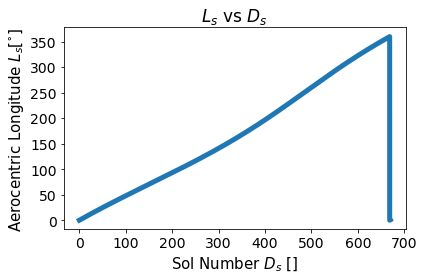

In [10]:
plt.plot(D_s,Ls, linewidth=5)
plt.title(r'$L_{s}$ vs $D_{s}$', fontsize=17)
plt.xlabel(r'Sol Number $D_{s}$ []', fontsize=15)
plt.ylabel(r'Aerocentric Longitude $L_{s}$[$^{\circ}$]', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('ls-vs-ds.png',dpi=300)

In [9]:

from mcd3 import mcd

In [10]:
scenario = 1
lat = 85
lon = 10
ls = 20
hr = 0

In [11]:
req = mcd()
req.dust = scenario
req.lat = lat
req.lon = lon
req.xdate = ls
req.loct = hr
req.fixedlt = True
req.update()
req.profile()




In [12]:
datavars=[91,93,63,62,57,42,45,44,39,38,32,31,30,33,92,2]
vals = [req.getextvar(var) for var in datavars]



In [13]:
req.lat = lat
req.lon = lon
req.xdate = ls
req.loct = hr
req.fixedlt = True
req.update()
req.profile()
np.clip(np.cos(np.deg2rad(req.getextvar(56)[0])),a_min=0, a_max=None)

0.058800086282857836

In [11]:
from fmcd import solarzenithangle

# z = solarzenithangle(lat,ls,hr)
# np.clip(np.cos(np.deg2rad(z)),a_min=0, a_max=None)

In [12]:
# for lati in )
lats = np.arange(-90,91,10)
hrss = np.arange(0,24.1,2)
lss = np.arange(0,360,20)

zs = np.zeros((len(lats),len(hrss),len(lss)))

In [13]:
for i in range(0,len(lats)):
    for j in range(0,len(hrss)):
        for k in range(0,len(lss)):
            z = solarzenithangle(lats[i],lss[k],hrss[j])
            zs[i,j,k] = np.clip(np.cos(np.deg2rad(z)),a_min=0, a_max=None)

In [14]:
# zs

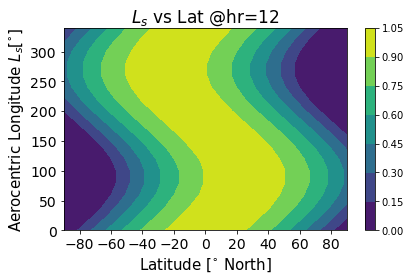

In [16]:
x,y = np.meshgrid(lats,lss)
plt.contourf(x,y,zs[:,6,:].transpose())
plt.colorbar()
plt.title(r'$L_{s}$ vs Lat @hr=12', fontsize=17)
plt.xlabel(r'Latitude [$^{\circ}$ North]', fontsize=15)
plt.ylabel(r'Aerocentric Longitude $L_{s}$[$^{\circ}$]', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('ls vs lat hr12.png',dpi=300)

# x,y = np.meshgrid(hrss,lats)
# plt.contourf(x,y,zs[:,:,1])
# plt.colorbar()
# plt.title(r'Lat vs Time @$L_{s}=20$', fontsize=17)
# plt.xlabel(r'Martian Time [hr]', fontsize=15)
# plt.ylabel(r'Latitude [$^{\circ}$ North]', fontsize=15)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.tight_layout()
# plt.savefig('lat vs time ls0',dpi=300)

In [64]:
a = zs[:,:,0]
a

array([[6.12323400e-17, 6.12323400e-17, 6.12323400e-17, 6.12323400e-17,
        6.12323400e-17, 6.12323400e-17, 6.12323400e-17, 6.12323400e-17,
        6.12323400e-17, 6.12323400e-17, 6.12323400e-17, 6.12323400e-17,
        6.12323400e-17],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.12323400e-17,
        8.68241096e-02, 1.50383685e-01, 1.73648178e-01, 1.50383685e-01,
        8.68241096e-02, 6.12323400e-17, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.12323400e-17,
        1.71010038e-01, 2.96198073e-01, 3.42020143e-01, 2.96198201e-01,
        1.71010038e-01, 6.12323400e-17, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.12323400e-17,
        2.50000067e-01, 4.33012682e-01, 5.00000000e-01, 4.33012682e-01,
        2.49999938e-01, 6.12323400e-17, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+

In [ ]:
# for i in range(0,len(lats)):
#     for j in range(0,len(hrss)):
#         for k in range(0,len(lss)):
#             req.lat = lats[i]
#             req.xdate = lss[k]
#             req.loct = hrss[j]
#             req.fixedlt = True
#             req.update()
#             req.profile()
#             z = np.clip(np.cos(np.deg2rad(req.getextvar(56)[0])),a_min=0, a_max=None)
#             zs[i,j,k] = z
#             
# x,y = np.meshgrid(lats,hrss)
# plt.contourf(x,y,zs[:,:,16].transpose())
# plt.colorbar()
